# Proyecto integrador - TC5035

## Christopher Valdez Cantu  #A01793549


In [1]:
#pip install clean-text

In [2]:
from cleantext import clean
from sklearn.feature_extraction.text import TfidfVectorizer
import ftfy
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from datetime import datetime

# Objetivos del proyecto

Para este proyecto se utilizaran 4 data sets, uno general y 3 especificos, el primero se trabajara en la primera parte y los otros 3 en la segunda parte. los 4 datasets se recolectaron utilizando webscrapping, para obtener un listado de productos rentables dentro de amazon, todos los productos en el dataset, han tenido buen desempeño de ventas y buenos reviews. 

EL primer dataset maneja productos de todas los sectores, y el objetivo de este dataset, durante la primera parte del proyecto sera encontrar como minimo 5 nichos rentables dentro de este. 

Por otra parte, los otros 3 datasets, tienen los productos mas filtrados, y se limitan a una industria por data set, por lo que el objetivo es encontrar al menos 3 nichos (mas especificos) rentables dentro de cada una de estas industras. 

# Parte 1 - Busqueda General

## Lectura de datos

In [3]:

# Leer el archivo CSV
df = pd.read_csv('Data/Busqueda_1.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

df

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B0BY7R11JB,Rebar-Stakes-12-Inch-Galvanized J Hook Rebar ...,QNLONG,"Patio, Lawn & Garden","$15,001.20","1,080",$13.89,N.A.,N.A.,"1,381",43.000000,6,1,05/27/2023,Amazon,4.8,N.A.,N.A.,N.A.
1,B0BYZPBF3L,CozeCube Light Beige Bath mats for Bathroom No...,CozeCube,Home & Kitchen,"$15,001.35","1,365",$24.99,N.A.,N.A.,"23,336",43.135135,7,2,03/19/2023,taianshiyujiadianzishangmaoyouxiangongsi,3.9,N.A.,N.A.,N.A.
2,B0C3GRT1Q3,PURPLE LADYBUG Scratch Art for Kids - Party Fa...,PURPLE LADYBUG,Toys & Games,"$15,004.31","1,669",$8.99,N.A.,N.A.,"7,824",5.000000,6,1,06/28/2023,Amazon,5.0,N.A.,N.A.,N.A.
3,B0CL9X56BK,Cordless Long Handle Replacement Brush Heads f...,Bilim,Health & Household,"$15,004.98","1,502",$9.99,N.A.,N.A.,N.A.,21.000000,5,1,06/18/2023,Amazon,5.0,N.A.,N.A.,N.A.
4,B0C1FY79XG,Fitwarm Cheerleader Dog Costume Sporty Cheer ...,Fitwarm,Pet Supplies,"$15,004.99","1,001",$14.99,$5.79,$9.20,"5,053",30.000000,6,1,04/03/2023,Amazon,4.3,"12.87"" x 9.80"" x 0.87""",Large standard-size,2.4 lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,B0CHMK5L2R,INPAKSA Women's Slippers Platform Mini Boots S...,INPAKSA,"Clothing, Shoes & Jewelry","$520,217.72","11,314",$45.98,N.A.,N.A.,"1,113",32.000000,7,1,09/07/2023,INPAKSAS,3.9,N.A.,N.A.,N.A.
10200,B07QQX6JVL,SEPARO Spandex Table Cover Fitted Rectangular ...,SEPARO,Kitchen & Dining,"$520,702.56","9,648",$53.97,N.A.,N.A.,524,2.000000,7,1,06/24/2023,Amazon,5.0,N.A.,N.A.,N.A.
10201,B0BLJJNFYN,HYC00 Travel Duffel Bag Sports Tote Gym/Should...,HYC00,"Clothing, Shoes & Jewelry","$520,906.40","13,360",$38.99,$12.58,$26.41,"74,253",12.000000,7,3,12/17/2022,Amazon Warehouse,4.4,"12.99"" x 10.28"" x 4.33""",Large standard-size,2.05 lbs
10202,B0CFKGY6XH,FREE VILLAGE Ice Makers Countertop Nugget Cube...,FREE VILLAGE,Appliances,"$521,539.94","2,006",$259.99,N.A.,N.A.,"2,907",10.000000,7,1,08/15/2023,progressUS,3.5,"11.30"" x 8.66"" x 12.68""",N.A.,N.A.


## Limpieza de los datos

In [4]:
df = df.drop_duplicates(subset='ASIN')

In [5]:
df = df.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [6]:
import pandas as pd
import ftfy

# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    df[col] = df[col].astype(str).apply(clean_text)

    
df.replace("N.A.", np.nan, inplace=True)
df.replace("na", np.nan, inplace=True)


In [7]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name             0
Brand                    3
Category                 0
Est. Monthly Revenue    53
Est. Monthly Sales      53
Price                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Rating                   0
dtype: int64


## Cambiar tipos de datos

In [8]:
print(df.dtypes)

Product Name             object
Brand                    object
Category                 object
Est. Monthly Revenue     object
Est. Monthly Sales       object
Price                    object
Reviews                 float64
LQS                       int64
Sellers                   int64
Date First Available     object
Rating                  float64
dtype: object


In [9]:
df['Rating'] = df['Rating'].round(2)
df = df.astype({'Reviews': 'float64', 'Reviews': 'int64'})

df['Est. Monthly Revenue'] = df['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
df['Est. Monthly Sales'] = df['Est. Monthly Sales'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')

df['Est. Monthly Sales'] = pd.to_numeric(df['Est. Monthly Sales'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Est. Monthly Revenue'] = pd.to_numeric(df['Est. Monthly Revenue'], errors='coerce')

C:\Users\Chris\AppData\Local\Temp\ipykernel_9792\2324043937.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Est. Monthly Revenue'] = df['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
C:\Users\Chris\AppData\Local\Temp\ipykernel_9792\2324043937.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')


## Caluclar tiempo en el mercado por producto

In [10]:
# Convertir la columna "Date First Available" a formato de fecha
df['Date First Available'] = pd.to_datetime(df['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
df['Time in Market (days)'] = (today - df['Date First Available']).dt.days

## drop NA

In [11]:
df = df.dropna(subset=['Est. Monthly Sales'])
df = df.dropna(subset=['Brand'])

In [12]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name             0
Brand                    0
Category                 0
Est. Monthly Revenue     0
Est. Monthly Sales       0
Price                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Rating                   0
Time in Market (days)    0
dtype: int64


## Ordenar columnas

In [47]:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
df = df[ordered_columns]


KeyError: "['Time in Market (days)'] not in index"

In [14]:
#pd.set_option('display.max_rows', None)
#pd.set_option('max_colwidth', None)
df

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue
0,rebarstakes12inchgalvanized j hook rebar stake...,patio lawn garden,qnlong,43,6,1,2023-05-27,166,4.8,13.89,1080.0,15001.20
1,cozecube light beige bath mats for bathroom no...,home kitchen,cozecube,43,7,2,2023-03-19,235,3.9,24.99,1365.0,15001.35
2,purple ladybug scratch art for kids party favo...,toys games,purple ladybug,5,6,1,2023-06-28,134,5.0,8.99,1669.0,15004.31
3,cordless long handle replacement brush heads f...,health household,bilim,21,5,1,2023-06-18,144,5.0,9.99,1502.0,15004.98
4,fitwarm cheerleader dog costume sporty cheer d...,pet supplies,fitwarm,30,6,1,2023-04-03,220,4.3,14.99,1001.0,15004.99
...,...,...,...,...,...,...,...,...,...,...,...,...
9899,inpaksa womens slippers platform mini boots sh...,clothing shoes jewelry,inpaksa,32,7,1,2023-09-07,63,3.9,45.98,11314.0,520217.72
9900,separo spandex table cover fitted rectangular ...,kitchen dining,separo,2,7,1,2023-06-24,138,5.0,53.97,9648.0,520702.56
9901,hyc00 travel duffel bag sports tote gymshoulde...,clothing shoes jewelry,hyc00,12,7,3,2022-12-17,327,4.4,38.99,13360.0,520906.40
9902,free village ice makers countertop nugget cube...,appliances,free village,10,7,1,2023-08-15,86,3.5,259.99,2006.0,521539.94


## Extracción de Palabras Clave

### Agrupación 

In [15]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list


In [16]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
df['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
df['Cluster'] = km.fit_predict(tfidf_matrix)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
df

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
0,rebarstakes12inchgalvanized j hook rebar stake...,patio lawn garden,qnlong,43,6,1,2023-05-27,166,4.8,13.89,1080.0,15001.20,"[stakes, turf, antirust, landscape, tent, grou...",0
1,cozecube light beige bath mats for bathroom no...,home kitchen,cozecube,43,7,2,2023-03-19,235,3.9,24.99,1365.0,15001.35,"[rugs, bath, bathroom, shag, area, mats, micro...",0
2,purple ladybug scratch art for kids party favo...,toys games,purple ladybug,5,6,1,2023-06-28,134,5.0,8.99,1669.0,15004.31,"[teen, crafts, ladybug, stuff, girls, scratch,...",2
3,cordless long handle replacement brush heads f...,health household,bilim,21,5,1,2023-06-18,144,5.0,9.99,1502.0,15004.98,"[dome, spin, adapter, heads, scrubber, corner,...",0
4,fitwarm cheerleader dog costume sporty cheer d...,pet supplies,fitwarm,30,6,1,2023-04-03,220,4.3,14.99,1001.0,15004.99,"[dog, sporty, cheer, cheerleader, outfits, pet...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,inpaksa womens slippers platform mini boots sh...,clothing shoes jewelry,inpaksa,32,7,1,2023-09-07,63,3.9,45.98,11314.0,520217.72,"[boot, slippers, antislip, fur, lined, platfor...",5
9900,separo spandex table cover fitted rectangular ...,kitchen dining,separo,2,7,1,2023-06-24,138,5.0,53.97,9648.0,520702.56,"[tablecloth, wrinklefree, banquet, weddings, r...",3
9901,hyc00 travel duffel bag sports tote gymshoulde...,clothing shoes jewelry,hyc00,12,7,3,2022-12-17,327,4.4,38.99,13360.0,520906.40,"[bag, pocket, duffel, weekender, laptop, overn...",2
9902,free village ice makers countertop nugget cube...,appliances,free village,10,7,1,2023-08-15,86,3.5,259.99,2006.0,521539.94,"[ice, nugget, chewy, village, operation, selfc...",0


In [18]:
# Identificación de Nichos Rentables
cluster_summary = df.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary)


         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0                81432.007453  4.316841          4998
1                69808.861494  4.273696           395
2                51586.553251  4.499339           772
3                44765.159270  4.350432           740
4                65310.365000  4.055383           548
5                79488.784594  4.146807           357
6               112143.748656  4.393688           320
7                59151.394709  4.273280           189
8                43013.401513  4.259781           456
9                85152.872157  4.338304           802


In [19]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:  # Top 5 palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 pack
 women
 womens
 black
 set
 storage
 hair
 inch
 nail
 white
 kit
 high
 light
 organizer
 home
 size
 kitchen
 men
 holder
 bathroom


Cluster 1:
 costume
 halloween
 cosplay
 dress
 girls
 women
 wig
 party
 kids
 adult
 costumes
 outfit
 accessories
 princess
 set
 men
 headband
 renaissance
 outfits
 wigs


Cluster 2:
 baby
 bag
 girls
 toys
 kids
 toddler
 boys
 toy
 girl
 gifts
 travel
 old
 ages
 months
 newborn
 birthday
 year
 bare
 childrens
 nfl


Cluster 3:
 party
 christmas
 birthday
 decorations
 gifts
 blanket
 covers
 table
 decor
 day
 throw
 pillow
 wedding
 couch
 inch
 sofa
 fall
 home
 gift
 decoration


Cluster 4:
 sleeve
 long
 tops
 shirts
 casual
 womens
 short
 women
 graphic
 shirt
 pullover
 neck
 sweatshirt
 tshirt
 fall
 dress
 crewneck
 summer
 loose
 toddler


Cluster 5:
 shoes
 boots
 toe
 womens
 sandals
 slip
 sneakers
 ankle
 walking
 comfortable
 women
 heel
 platform
 chunky
 dress
 casual
 lightweight
 heels

## Definición de nichos en base a las palabras clave por cluster

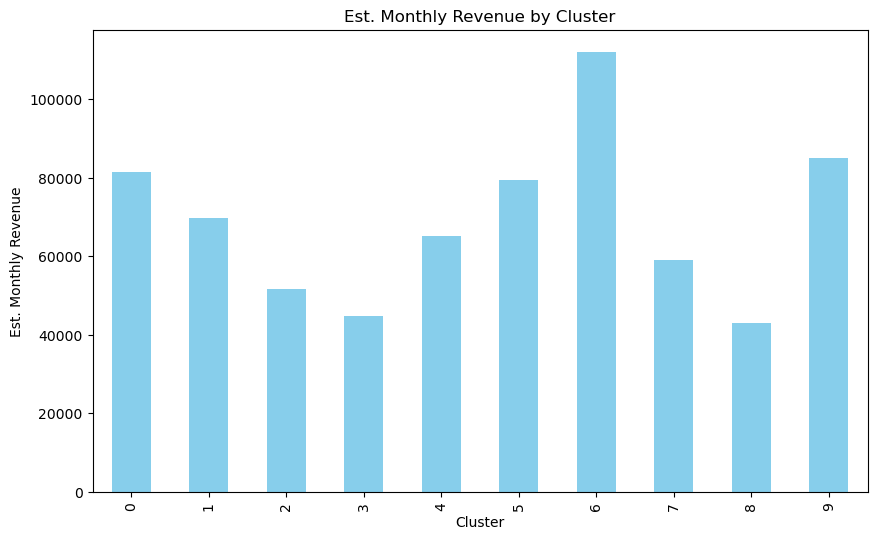

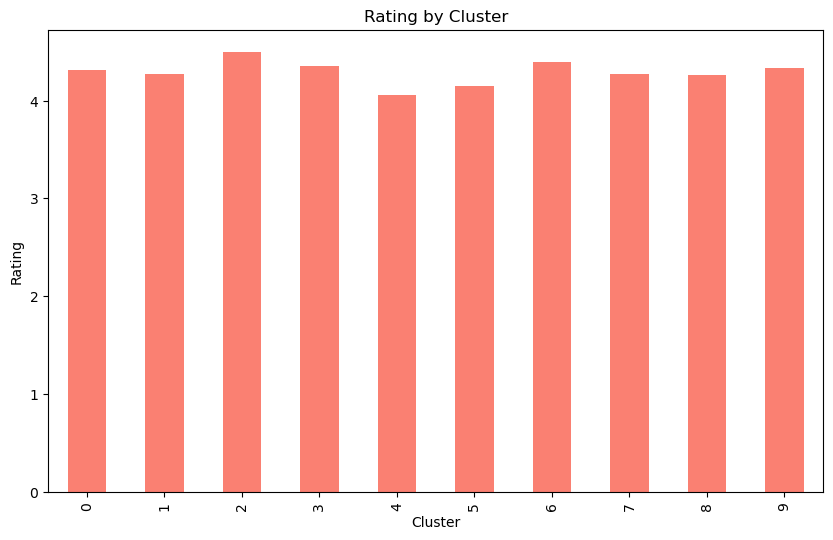

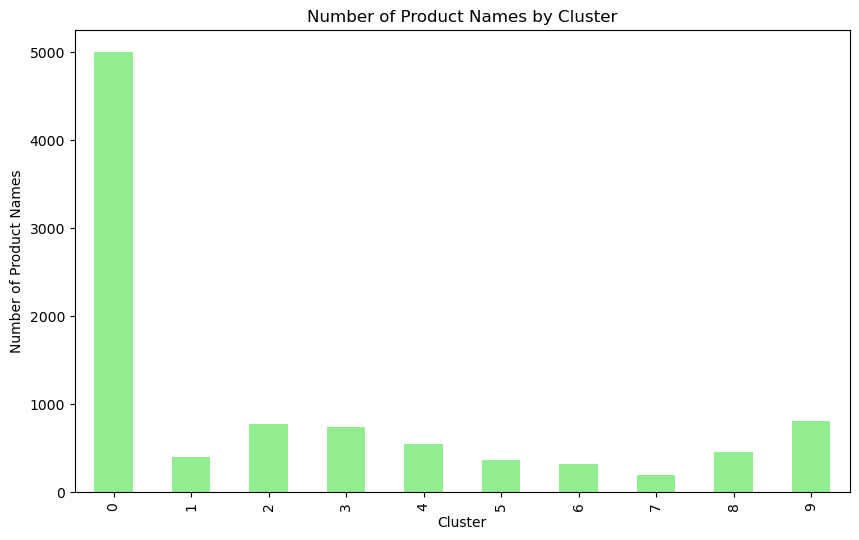

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()


### Cluster 0: Almacenamiento y Accesorios Personales

Este nicho se centra en productos de almacenamiento y accesorios personales. Incluye soluciones de organización para el hogar, productos para el cuidado del cabello, kits de manicura y artículos de cocina. Está orientado a personas interesadas en la organización del hogar y el cuidado personal.

### Cluster 1: Disfraces y Vestuario para Fiestas
Un nicho dedicado a disfraces y atuendos para diversas ocasiones como Halloween, cosplay y fiestas temáticas. Incluye vestidos, pelucas y accesorios tanto para niños como para adultos, ideal para entusiastas de las fiestas y eventos temáticos.

### Cluster 2: Productos para Bebés y Niños Pequeños
Este nicho abarca productos para bebés y niños pequeños, incluyendo juguetes, bolsas de viaje, y regalos. Es adecuado para padres y personas que buscan obsequios para niños en diferentes etapas de crecimiento.

### Cluster 3: Decoración y Regalos para Fiestas
Se centra en artículos de decoración para fiestas y eventos, como navidad, cumpleaños y bodas. Incluye mantas, fundas de almohadas, decoraciones de mesa y regalos, apuntando a planificadores de eventos y decoradores de hogar.

### Cluster 4: Ropa Casual y de Temporada
Un nicho enfocado en ropa casual, especialmente camisetas y tops para mujeres. Ofrece una variedad de estilos, desde manga larga y corta hasta sudaderas y vestidos, ideal para quienes buscan comodidad y estilo en su vestuario diario.

### Cluster 5: Calzado
Este nicho se especializa en zapatos y botas, principalmente para mujeres. Incluye sandalias, zapatillas, botines y tacones, enfocado en la comodidad y el estilo para diversas ocasiones.

### Cluster 6: Ropa y Accesorios para Hombres
Un nicho dedicado a la moda masculina, incluyendo boxers, camisetas, chaquetas, pantalones y polos. Es ideal para hombres que buscan confort y estilo en su vestimenta cotidiana.

### Cluster 7: Artículos para Mascotas
Este nicho abarca productos para mascotas, especialmente perros y gatos. Incluye collares, arneses, juguetes, alimentos y camas, dirigido a dueños de mascotas que buscan productos de calidad.

### Cluster 8: Decoración de Halloween
Un nicho centrado en decoraciones para Halloween, incluyendo luces, adornos para interiores y exteriores, y artículos temáticos como calabazas y fantasmas. Es ideal para entusiastas de Halloween y organizadores de fiestas.

### Cluster 9: Productos de Bienestar y Bebidas
Este nicho se enfoca en productos relacionados con la salud y el bienestar, como aceites esenciales, café, té y productos orgánicos. Está orientado a personas interesadas en un estilo de vida saludable y natural.

## Ejemplo de cluster 9 

In [29]:
pd.set_option('display.max_colwidth', None)
df.loc[df['Cluster'] == 9].head(50)


,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
50,goodpick coffee scented candles 22 oz classic luxury candles for home 2wick soy candle large jar candles gifts for women birthday christmas bath 120 hours burn time,home kitchen,goodpick,15,7,1,2023-08-19,82,2.83,14.99,1007.0,15094.93,"[candles, burn, soy, jar, time, luxury, 22, 120, hours, scented]",9
58,cedar essential oil 4 fl oz 120ml pure and natural fragrance oil cedar oil for aroma diffuser humidifier skincare home fragrance bath spa hair care cleaning personal care massage yoga,health household,gv77zf,8,6,1,2023-08-16,85,4.03,9.99,1512.0,15104.88,"[cedar, oil, fragrance, care, 120ml, humidifier, aroma, skincare, diffuser, personal]",9
85,salubrito candy corn essential oil 4 floz 120ml pure natural fragrance oils autumn aromatherapy oil for diffuser great for skin massage candle soap making scented oil,health household,salubrito,26,7,1,2023-05-29,164,3.90,16.99,1082.0,15137.18,"[oil, 120ml, floz, corn, diffuser, massage, fragrance, great, oils, aromatherapy]",9
94,hydrating lip glow oil moisturizing lip glow oil nourishing glossy transparent lip oil plumping lip oil lip balm nonsticky tinted toot lip balm for lip care aloe 02 oz,beauty personal care,gecomo,47,6,1,2023-08-15,86,4.00,5.85,2592.0,15163.20,"[lip, oil, balm, glow, 02, nonsticky, nourishing, hydrating, aloe, glossy]",9
102,propel powder packets kiwi strawberry with electrolytes vitamins and no sugar 10 count pack of 2 20 count in totalpackaging may vary,grocery gourmet food,supreme box,35,6,1,2023-07-04,128,4.70,14.99,1013.0,15184.87,"[count, electrolytes, strawberry, vary, packets, vitamins, powder, sugar, 20, 10]",9
114,aozita 100 pack 9 oz gold glitter plastic cups disposable gold plastic tumblers cups hard plastic cups for wedding birthday baby shower party,health household,aozita,10,7,1,2023-06-06,156,4.60,13.99,1087.0,15207.13,"[cups, plastic, gold, aozita, tumblers, hard, glitter, disposable, shower, wedding]",9
118,castor oil pack wrap for feet organic castor oil pack reusable and anti oil leak with laundry storage bags castor oil not included,health household,palksky,10,7,1,2023-08-20,81,4.30,16.99,1015.0,15214.85,"[oil, castor, leak, included, pack, anti, laundry, wrap, feet, organic]",9
133,axe body spray deodorant phoenix for long lasting odor protection deodorant for men formulated without aluminum 51 oz,beauty personal care,axe,14,6,4,2023-08-16,85,4.60,6.88,2217.0,15252.96,"[deodorant, 51, formulated, odor, aluminum, lasting, protection, spray, body, men]",9
144,jamaican black castor oil for hair growth organic castor oil 100 pure cold pressed black castor oil for body hair skin moisturizing massage oil for aromatherapy,beauty personal care,bestniffes,37,7,1,2023-08-13,88,4.70,14.99,1019.0,15274.81,"[oil, castor, hair, jamaican, black, pressed, moisturizing, massage, growth, aromatherapy]",9
175,dionis goat milk hand body lotion 33 oz full size travel tube of sugarberry scented cream vitamins minerals moisturize hydrate dry skin for softer skin rich creamy paraben free formula,beauty personal care,dionis,4,6,1,2023-08-09,92,4.20,13.99,1097.0,15347.03,"[skin, softer, goat, paraben, creamy, minerals, 33, lotion, rich, vitamins]",9


## PART 2 - Busquedas filtradas

## Busqueda 2 - Maquillaje

In [33]:

# Leer el archivo CSV
Busqueda_2 = pd.read_csv('Data/Busqueda_2.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

Busqueda_2

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B0BHSRXS2T,(5+5) Powder Puff Makeup Sponge Blender Beauty Face Triangle Makeup Cosmetic Puff Latext-free Makeup Wedge Foundation Sponge Blender to Make Up Tools Applicator Sponges (black),YEOTWIN,Beauty & Personal Care,"$9,073.02","1,298",$6.99,$4.10,$2.89,"10,521",987,6,1,04/25/2023,Amazon,4.5,"5.43"" x 4.65"" x 2.20""",Large standard-size,2.15 lbs
1,B08CMVXB19,(6Pack) MAX Makeup Cherimoya Lip Polish Coconut Oil Clear Gloss (2Original+2Coconut+2Honey),Cherimoya,Beauty & Personal Care,"$11,757.78","1,574",$7.90,$3.52,$4.38,"10,332",2299.2,6,9,10/29/2019,Amazon,4.4,"4.65"" x 4.37"" x 0.67""",Small standard-size,5.29 lbs
2,B0BGLT253H,1 Box of Flat Back Pearls Kits Half Round White&Beige Pearls with Quick Dry Makeup Glue+Picker Pencil+Tweezer for Nail Art and Face Eye Body Make-up,BELLEBOOST,Beauty & Personal Care,"$192,948.83","25,317",$7.99,$3.40,$4.59,N.A.,592.7272727,7,1,09/14/2023,Amazon,4.572727273,"6.97"" x 3.70"" x 0.55""",Small standard-size,2.4 lbs
3,B09FJHHC3G,1 pcs Liquid Eyeliner Set Glitter Liquid Eyeliner Waterproof Shimmer Silver Gold Metallic Colorful Eyeliners Eyeshadow Makeup 1#,Emirde,Beauty & Personal Care,"$5,089.80","1,020",$4.99,$3.32,$1.67,"14,050",876,7,1,08/22/2020,Emirde,4.1,"0.55"" x 0.67"" x 3.27""",Small standard-size,0.0397 lbs
4,B0BNCH3XCY,1.5-6mm Round Flatback Face Gems Kit (AB) for Makeup with Quick Dry Glue + Brush + Tweezer Nail Art Rhinestones Iridescent Glass Crystal Beads for Make-up Deco,BELLEBOOST,Beauty & Personal Care,"$16,059.90","2,010",$7.99,N.A.,N.A.,"14,449",401.8181818,7,1,10/20/2022,Amazon,4.609090909,N.A.,N.A.,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,B098QSRTZL,Zombie Makeup Halloween Makeup Tattoos - 11 Sheets Fake Blood Fake Scar Tattoos Halloween Makeup Kit Zombie Makeup Kit for Kids and Adults Scary Wound Stitches Vampire Makeup Fake Cuts Zombie Tattoos,PARIGO,Beauty & Personal Care,"$10,029.96","1,004",$9.99,$3.72,$6.27,"150,121",237,7,1,09/25/2020,Parigo Profession Store,4.2,"0.16"" x 5.20"" x 12.52""",Small standard-size,0.3086 lbs
2499,B0CCF5Y68D,ZOREYA Makeup Brush Set - 15 Pcs Premium Synthetic Foundation Concealers Eye Shadows Make Up Brush Eyeliner Brushes(Pink),Raffaello,Beauty & Personal Care,"$50,695.82","2,818",$17.99,$6.47,$11.52,"7,750",7731.833333,7,1,01/31/2023,Amazon,4.6,"7.17"" x 4.88"" x 1.73""",Large standard-size,8.47 lbs
2500,B09QZXFWXD,ZQQZAN Clear Makeup Organizer Set 360 Rotating Makeup Organizer with Makeup Palette Organizer 6-Layer Adjustable Cosmetic Organizer Perfume and Lotion Holder Makeup Storage Organizer Countertop,ZQQZAN,Beauty & Personal Care,"$19,518.50","1,030",$17.95,$8.63,$9.32,"24,059",683,7,1,12/11/2021,Amazon,4.6,"3.58"" x 9.25"" x 11.97""",Large standard-size,2.1892 lbs
2501,B0BVBR18NM,Zrfmib Travel Makeup Bag with Light Up Mirror Makeup Train Case with Adjustable Dividers and Shoulder Strap Portable Extra Large Makeup Travel Bag Waterproof Leather Material with Detachable Mirror,Zrfmib,Beauty & Personal Care,"$19,939.50","1,050",$18.99,N.A.,N.A.,"16,992",33,7,1,04/12/2023,Amazon,4.1,N.A.,N.A.,N.A.


In [34]:
Busqueda_2 = Busqueda_2.drop_duplicates(subset='ASIN')

In [35]:
Busqueda_2 = Busqueda_2.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [49]:
# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    Busqueda_2[col] = Busqueda_2[col].astype(str).apply(clean_text)

    
Busqueda_2.replace("N.A.", np.nan, inplace=True)
Busqueda_2.replace("na", np.nan, inplace=True)


In [50]:
# Verificar valores faltantes
missing_values = Busqueda_2.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name             0
Category                 0
Brand                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Time in Market (days)    0
Rating                   8
Price                    0
Est. Monthly Sales       0
Est. Monthly Revenue     0
dtype: int64


In [51]:
print(Busqueda_2.dtypes)

Product Name                     object
Category                         object
Brand                            object
Reviews                           int64
LQS                               int64
Sellers                           int64
Date First Available     datetime64[ns]
Time in Market (days)             int64
Rating                          float64
Price                           float64
Est. Monthly Sales              float64
Est. Monthly Revenue            float64
dtype: object


In [52]:
Busqueda_2['Rating'] = pd.to_numeric(Busqueda_2['Rating'], errors='coerce')
Busqueda_2['Rating'] = Busqueda_2['Rating'].round(2)

# Si 'Reviews' contiene decimales, primero convierte a float y luego a int
Busqueda_2['Reviews'] = pd.to_numeric(Busqueda_2['Reviews'], errors='coerce').fillna(0).astype('int64')

Busqueda_2['Est. Monthly Revenue'] = Busqueda_2['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
Busqueda_2['Est. Monthly Sales'] = Busqueda_2['Est. Monthly Sales'].str.replace(',', '')
Busqueda_2['Price'] = Busqueda_2['Price'].str.replace('$', '').str.replace(',', '')

Busqueda_2['Est. Monthly Sales'] = pd.to_numeric(Busqueda_2['Est. Monthly Sales'], errors='coerce')
Busqueda_2['Price'] = pd.to_numeric(Busqueda_2['Price'], errors='coerce')
Busqueda_2['Est. Monthly Revenue'] = pd.to_numeric(Busqueda_2['Est. Monthly Revenue'], errors='coerce')


AttributeError: Can only use .str accessor with string values!

## Caluclar tiempo en el mercado por producto

In [53]:
# Convertir la columna "Date First Available" a formato de fecha
Busqueda_2['Date First Available'] = pd.to_datetime(Busqueda_2['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
Busqueda_2['Time in Market (days)'] = (today - Busqueda_2['Date First Available']).dt.days

## Drop NA

In [54]:
Busqueda_2 = Busqueda_2.dropna(subset=['Est. Monthly Sales'])
Busqueda_2 = Busqueda_2.dropna(subset=['Brand'])

In [55]:
# Verificar valores faltantes
missing_values = Busqueda_2.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name             0
Category                 0
Brand                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Time in Market (days)    0
Rating                   8
Price                    0
Est. Monthly Sales       0
Est. Monthly Revenue     0
dtype: int64


In [56]:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
Busqueda_2 = Busqueda_2[ordered_columns]


In [57]:
Busqueda_2

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue
0,5+5 powder puff makeup sponge blender beauty face triangle makeup cosmetic puff latextfree makeup wedge foundation sponge blender to make up tools applicator sponges black,beauty personal care,yeotwin,987,6,1,2023-04-25,198,4.50,6.99,1298.0,9073.02
1,6pack max makeup cherimoya lip polish coconut oil clear gloss 2original+2coconut+2honey,beauty personal care,cherimoya,2299,6,9,2019-10-29,1472,4.40,7.90,1574.0,11757.78
2,1 box of flat back pearls kits half round whitebeige pearls with quick dry makeup glue+picker pencil+tweezer for nail art and face eye body makeup,beauty personal care,belleboost,592,7,1,2023-09-14,56,4.57,7.99,25317.0,192948.83
3,1 pcs liquid eyeliner set glitter liquid eyeliner waterproof shimmer silver gold metallic colorful eyeliners eyeshadow makeup 1,beauty personal care,emirde,876,7,1,2020-08-22,1174,4.10,4.99,1020.0,5089.80
4,156mm round flatback face gems kit ab for makeup with quick dry glue + brush + tweezer nail art rhinestones iridescent glass crystal beads for makeup deco,beauty personal care,belleboost,401,7,1,2022-10-20,385,4.61,7.99,2010.0,16059.90
...,...,...,...,...,...,...,...,...,...,...,...,...
2498,zombie makeup halloween makeup tattoos 11 sheets fake blood fake scar tattoos halloween makeup kit zombie makeup kit for kids and adults scary wound stitches vampire makeup fake cuts zombie tattoos,beauty personal care,parigo,237,7,1,2020-09-25,1140,4.20,9.99,1004.0,10029.96
2499,zoreya makeup brush set 15 pcs premium synthetic foundation concealers eye shadows make up brush eyeliner brushespink,beauty personal care,raffaello,7731,7,1,2023-01-31,282,4.60,17.99,2818.0,50695.82
2500,zqqzan clear makeup organizer set 360 rotating makeup organizer with makeup palette organizer 6layer adjustable cosmetic organizer perfume and lotion holder makeup storage organizer countertop,beauty personal care,zqqzan,683,7,1,2021-12-11,698,4.60,17.95,1030.0,19518.50
2501,zrfmib travel makeup bag with light up mirror makeup train case with adjustable dividers and shoulder strap portable extra large makeup travel bag waterproof leather material with detachable mirror,beauty personal care,zrfmib,33,7,1,2023-04-12,211,4.10,18.99,1050.0,19939.50


## Extracción de Palabras Clave

### Agrupación 

In [59]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list

In [66]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(Busqueda_2['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
Busqueda_2['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
Busqueda_2['Cluster'] = km.fit_predict(tfidf_matrix)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [67]:
Busqueda_2

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
0,5+5 powder puff makeup sponge blender beauty face triangle makeup cosmetic puff latextfree makeup wedge foundation sponge blender to make up tools applicator sponges black,beauty personal care,yeotwin,987,6,1,2023-04-25,198,4.50,6.99,1298.0,9073.02,"[blender, puff, latextfree, sponge, wedge, triangle, applicator, tools, sponges, make]",3
1,6pack max makeup cherimoya lip polish coconut oil clear gloss 2original+2coconut+2honey,beauty personal care,cherimoya,2299,6,9,2019-10-29,1472,4.40,7.90,1574.0,11757.78,"[2coconut, 2original, 2honey, cherimoya, 6pack, max, coconut, polish, gloss, oil]",7
2,1 box of flat back pearls kits half round whitebeige pearls with quick dry makeup glue+picker pencil+tweezer for nail art and face eye body makeup,beauty personal care,belleboost,592,7,1,2023-09-14,56,4.57,7.99,25317.0,192948.83,"[pearls, whitebeige, picker, half, tweezer, quick, glue, kits, box, flat]",2
3,1 pcs liquid eyeliner set glitter liquid eyeliner waterproof shimmer silver gold metallic colorful eyeliners eyeshadow makeup 1,beauty personal care,emirde,876,7,1,2020-08-22,1174,4.10,4.99,1020.0,5089.80,"[eyeliner, eyeliners, liquid, silver, colorful, metallic, gold, shimmer, glitter, eyeshadow]",2
4,156mm round flatback face gems kit ab for makeup with quick dry glue + brush + tweezer nail art rhinestones iridescent glass crystal beads for makeup deco,beauty personal care,belleboost,401,7,1,2022-10-20,385,4.61,7.99,2010.0,16059.90,"[156mm, deco, tweezer, beads, iridescent, ab, glass, flatback, quick, glue]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,zombie makeup halloween makeup tattoos 11 sheets fake blood fake scar tattoos halloween makeup kit zombie makeup kit for kids and adults scary wound stitches vampire makeup fake cuts zombie tattoos,beauty personal care,parigo,237,7,1,2020-09-25,1140,4.20,9.99,1004.0,10029.96,"[tattoos, zombie, fake, cuts, kit, halloween, stitches, scary, 11, wound]",4
2499,zoreya makeup brush set 15 pcs premium synthetic foundation concealers eye shadows make up brush eyeliner brushespink,beauty personal care,raffaello,7731,7,1,2023-01-31,282,4.60,17.99,2818.0,50695.82,"[zoreya, brushespink, brush, concealers, shadows, 15, synthetic, premium, eyeliner, make]",0
2500,zqqzan clear makeup organizer set 360 rotating makeup organizer with makeup palette organizer 6layer adjustable cosmetic organizer perfume and lotion holder makeup storage organizer countertop,beauty personal care,zqqzan,683,7,1,2021-12-11,698,4.60,17.95,1030.0,19518.50,"[organizer, zqqzan, 6layer, perfume, lotion, countertop, rotating, 360, adjustable, holder]",6
2501,zrfmib travel makeup bag with light up mirror makeup train case with adjustable dividers and shoulder strap portable extra large makeup travel bag waterproof leather material with detachable mirror,beauty personal care,zrfmib,33,7,1,2023-04-12,211,4.10,18.99,1050.0,19939.50,"[zrfmib, material, mirror, shoulder, dividers, strap, bag, detachable, train, extra]",5


In [71]:
# Identificación de Nichos Rentables
cluster_summary_2 = Busqueda_2.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary_2)


         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0                49836.703320  4.528125           241
1                91017.469028  4.438611           144
2                30303.383139  4.316742           223
3                46279.521111  4.594921           126
4                34525.517021  4.308929           141
5                41731.819071  4.569206           280
6                78007.241212  4.369693          1172
7                46370.843520  4.207760           125


In [72]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :20]:  # Top 5 palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 brush
 brushes
 foundation
 makeup
 set
 blending
 powder
 synthetic
 holder
 eye
 blush
 cleaner
 kabuki
 concealer
 premium
 eyelash
 eyebrow
 eyeshadow
 liquid
 make


Cluster 1:
 mirror
 vanity
 lighted
 lights
 led
 magnification
 magnifying
 touch
 10x
 dimmable
 light
 makeup
 rechargeable
 portable
 travel
 adjustable
 lighting
 compact
 screen
 sided


Cluster 2:
 glitter
 eye
 eyeshadow
 shimmer
 palette
 face
 body
 eyeliner
 gems
 makeup
 shadow
 stick
 lasting
 rhinestones
 waterproof
 matte
 nail
 long
 pigmented
 pencil


Cluster 3:
 powder
 sponge
 puff
 blender
 beauty
 sponges
 foundation
 triangle
 makeup
 loose
 puffs
 setting
 soft
 pcs
 face
 velour
 liquid
 cream
 blending
 latex


Cluster 4:
 blood
 halloween
 paint
 fake
 face
 body
 cosplay
 sfx
 makeup
 tattoos
 zombie
 costume
 clown
 kit
 temporary
 vampire
 special
 black
 tattoo
 adults


Cluster 5:
 bag
 travel
 cosmetic
 toiletry
 women
 organizer
 pouch
 bags
 large
 

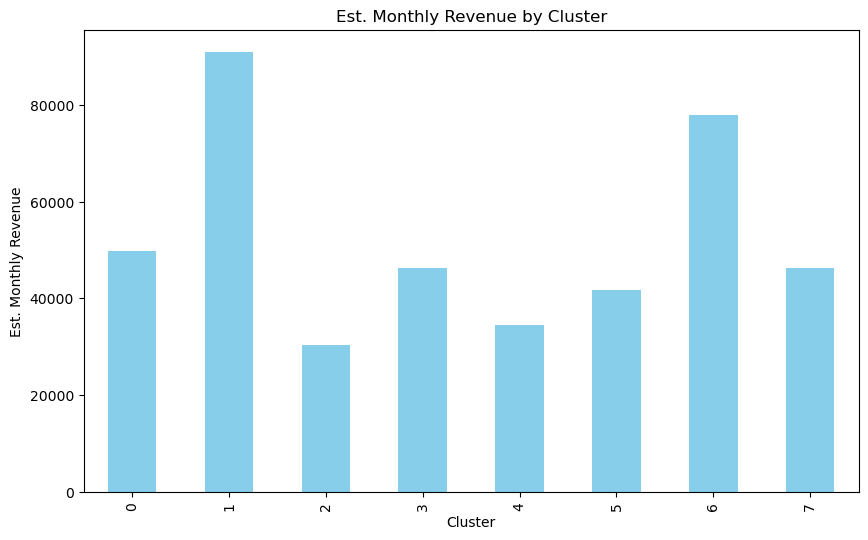

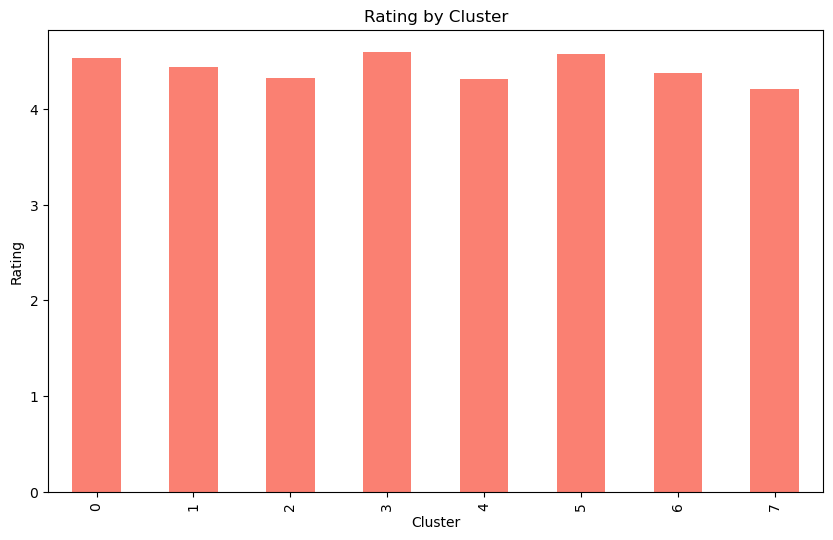

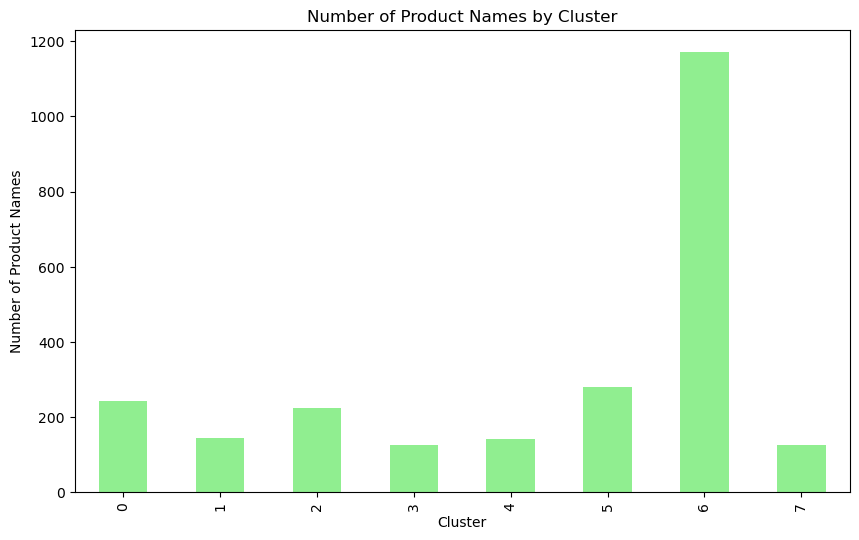

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary_2['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary_2['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary_2['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()

## Interpretacion de los nichos

### Cluster 0: "Herramientas y Pinceles de Maquillaje de Alta Calidad"
Este cluster está centrado en herramientas y pinceles de maquillaje de alta calidad, incluyendo brochas para base, pinceles de sombra de ojos y mezcladores. Los términos clave incluyen "brush", "foundation", "blending", "powder" y "synthetic". Este nicho podría atraer a entusiastas del maquillaje que buscan herramientas profesionales para lograr una aplicación de maquillaje perfecta.

### Cluster 1: "Espejos de Maquillaje con Iluminación"
Este cluster se relaciona con espejos de maquillaje que incorporan iluminación, como luces LED y opciones de aumento. Los términos clave incluyen "mirror", "vanity", "lighted", "magnification" y "dimmable". Este nicho podría interesar a personas que desean un espejo de maquillaje con una iluminación óptima para su rutina de belleza.

### Cluster 2: "Maquillaje de Brillo y Fantasía"
Este cluster se enfoca en productos de maquillaje con brillo y elementos de fantasía, como sombras de ojos brillantes, paletas de sombras, delineadores y gemas. Los términos clave incluyen "glitter", "shimmer", "eyeshadow", "palette" y "lasting". Este nicho podría atraer a personas que buscan crear looks de maquillaje llamativos y creativos.

### Cluster 3: "Productos de Maquillaje en Polvo y Esponjas"
Este cluster se centra en productos en polvo, esponjas y herramientas relacionadas para la aplicación de maquillaje. Los términos clave incluyen "powder", "sponge", "puff", "blender" y "foundation". Este nicho podría dirigirse a personas que prefieren productos de maquillaje en polvo y esponjas para lograr un aspecto impecable.

### Cluster 4: "Maquillaje y Accesorios para Eventos Especiales"
Este cluster parece estar relacionado con maquillaje y accesorios utilizados en eventos especiales y de fantasía, como Halloween, cosplay y efectos especiales. Los términos clave incluyen "blood", "halloween", "cosplay", "zombie" y "temporary". Este nicho podría interesar a aquellos que buscan productos para caracterización y disfraces.

### Cluster 5: "Bolsos y Organizadores de Maquillaje"
Este cluster se relaciona con bolsos, estuches y organizadores para guardar productos de maquillaje y artículos de tocador. Los términos clave incluyen "bag", "cosmetic", "toiletry", "organizer" y "portable". Este nicho podría atraer a personas que necesitan soluciones de almacenamiento y transporte para sus productos de belleza.

### Cluster 6: "Productos de Cuidado de la Piel y Desmaquillantes"
Este cluster se centra en productos de cuidado de la piel y desmaquillantes, incluyendo removedores de maquillaje, mascarillas faciales y productos para el cuidado de las cejas y las pestañas. Los términos clave incluyen "remover", "skin", "lashes", "eyebrow" y "cleansing". Este nicho podría dirigirse a personas preocupadas por el cuidado de la piel y la limpieza facial.

### Cluster 7: "Productos de Labios de Larga Duración y Colores Variados"
Este cluster está relacionado con productos de labios, como lápices labiales, brillos y delineadores de labios, con énfasis en colores variados y durabilidad. Los términos clave incluyen "lip", "lipstick", "matte", "gloss" y "lasting". Este nicho podría atraer a personas que desean opciones de labios versátiles y de larga duración.